In [2]:
import ROOT
import glob
import os

Welcome to JupyROOT 6.28/00


In [3]:
files2016 = "/scratch-cbe/users/robert.schoefbeck/TT2lUnbinned/nanoTuples/TT2lUnbinned_v7/UL2016/dilep/TTLep_pow_CP5"

files = glob.glob(files2016+"/*.root")

In [4]:
interesting_branches = []

file0 = files[0]
tf = ROOT.TFile.Open(file0)
tree = tf.Get("Events")
for branch in tree.GetListOfBranches():
    name = branch.GetName()
    if name.startswith("tr_") and not (name.endswith("Up") or name.endswith("Down")):
        interesting_branches.append(name)


# interesting_branches = interesting_branches[:5]

In [5]:
interesting_branches

['tr_jetB_index',
 'tr_jetBbar_index',
 'tr_ntags',
 'tr_neutrino_pt',
 'tr_neutrino_eta',
 'tr_neutrino_phi',
 'tr_neutrino_mass',
 'tr_neutrinoBar_pt',
 'tr_neutrinoBar_eta',
 'tr_neutrinoBar_phi',
 'tr_neutrinoBar_mass',
 'tr_ttbar_pt',
 'tr_ttbar_eta',
 'tr_ttbar_phi',
 'tr_ttbar_mass',
 'tr_ttbar_dAbsEta',
 'tr_ttbar_dEta',
 'tr_top_pt',
 'tr_top_eta',
 'tr_top_phi',
 'tr_top_mass',
 'tr_topBar_pt',
 'tr_topBar_eta',
 'tr_topBar_phi',
 'tr_topBar_mass',
 'tr_Wminus_pt',
 'tr_Wminus_eta',
 'tr_Wminus_phi',
 'tr_Wminus_mass',
 'tr_Wplus_pt',
 'tr_Wplus_eta',
 'tr_Wplus_phi',
 'tr_Wplus_mass',
 'tr_cosThetaPlus_n',
 'tr_cosThetaMinus_n',
 'tr_cosThetaPlus_r',
 'tr_cosThetaMinus_r',
 'tr_cosThetaPlus_k',
 'tr_cosThetaMinus_k',
 'tr_cosThetaPlus_r_star',
 'tr_cosThetaMinus_r_star',
 'tr_cosThetaPlus_k_star',
 'tr_cosThetaMinus_k_star',
 'tr_xi_nn',
 'tr_xi_rr',
 'tr_xi_kk',
 'tr_xi_nr_plus',
 'tr_xi_nr_minus',
 'tr_xi_rk_plus',
 'tr_xi_rk_minus',
 'tr_xi_nk_plus',
 'tr_xi_nk_minus',
 '

In [6]:
# Build chain
ch = ROOT.TChain("Events")
for f in files:
    ch.Add(f)

In [7]:
interesting_branches.append("Generator_x1")
interesting_branches.append("Generator_x2")

In [9]:
for branch in interesting_branches:
    max_val = tree.GetMaximum(branch)
    min_val = tree.GetMinimum(branch)
    print(f"{branch}: [{branch}, \';{branch};Counts\',100,{min_val:.3f},{(max_val):.3f}]")

tr_jetB_index: [tr_jetB_index, ';tr_jetB_index;Counts',100,-1.000,12.000]
tr_jetBbar_index: [tr_jetBbar_index, ';tr_jetBbar_index;Counts',100,-1.000,9.000]
tr_ntags: [tr_ntags, ';tr_ntags;Counts',100,-1.000,2.000]
tr_neutrino_pt: [tr_neutrino_pt, ';tr_neutrino_pt;Counts',100,0.897,25038.904]
tr_neutrino_eta: [tr_neutrino_eta, ';tr_neutrino_eta;Counts',100,-99999997952.000,7.103]
tr_neutrino_phi: [tr_neutrino_phi, ';tr_neutrino_phi;Counts',100,-3.141,3.141]
tr_neutrino_mass: [tr_neutrino_mass, ';tr_neutrino_mass;Counts',100,-0.002,0.000]
tr_neutrinoBar_pt: [tr_neutrinoBar_pt, ';tr_neutrinoBar_pt;Counts',100,0.440,25047.525]
tr_neutrinoBar_eta: [tr_neutrinoBar_eta, ';tr_neutrinoBar_eta;Counts',100,-99999997952.000,8.646]
tr_neutrinoBar_phi: [tr_neutrinoBar_phi, ';tr_neutrinoBar_phi;Counts',100,-3.141,3.142]
tr_neutrinoBar_mass: [tr_neutrinoBar_mass, ';tr_neutrinoBar_mass;Counts',100,-0.001,0.006]
tr_ttbar_pt: [tr_ttbar_pt, ';tr_ttbar_pt;Counts',100,0.558,849.147]
tr_ttbar_eta: [tr_ttbar_

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file png/tr_jetB_index.png has been created
Info in <TCanvas::Print>: pdf file pdf/tr_jetB_index.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file png/tr_jetBbar_index.png has been created
Info in <TCanvas::Print>: pdf file pdf/tr_jetBbar_index.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file png/tr_ntags.png has been created
Info in <TCanvas::Print>: pdf file pdf/tr_ntags.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file png/tr_neutrino_pt.png has been created
Info in <TCanvas::Print>: pdf file pdf/tr_neutrino_pt.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file png/tr_neutrino_eta.png has be

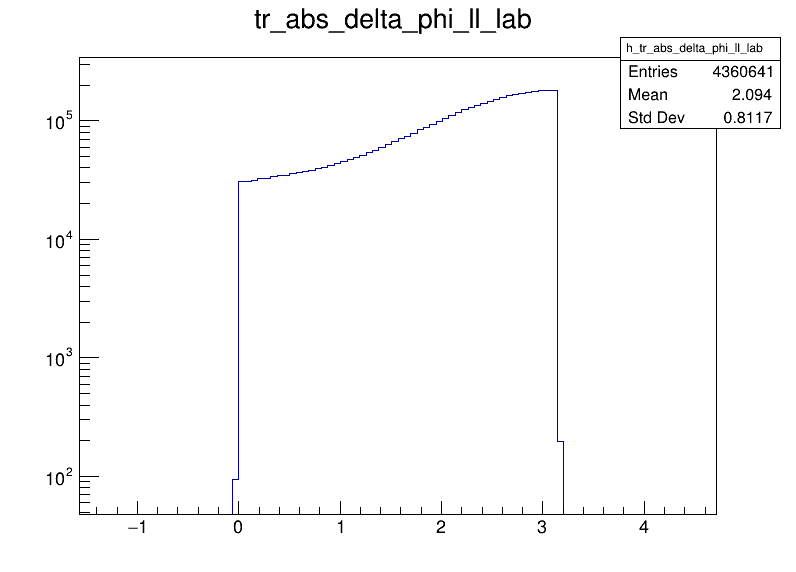

In [44]:
filter_condition = "tr_ttbar_mass>500"


for branch in interesting_branches:
    canvas = ROOT.TCanvas("c", "c", 800, 600)
    canvas.SetLogy(True)
    max_val = tree.GetMaximum(branch)
    min_val = tree.GetMinimum(branch)
    delta_val = (max_val - min_val) / 2

    hist = ROOT.TH1F("h_"+branch, branch, 100, min_val - delta_val, max_val + delta_val)
    ch.Draw(branch+">>h_"+branch, filter_condition, "goff")
    hist.Draw()
    canvas.Draw()
    canvas.SaveAs(os.path.join("png/", f"{branch}.png"))
    canvas.SaveAs(os.path.join("pdf/", f"{branch}.pdf"))


In [ ]:
# RDF version

#!/usr/bin/env python3
import os
import ROOT

ROOT.gROOT.SetBatch(True)
ROOT.gStyle.SetOptStat(0)
ROOT.EnableImplicitMT()  # optional speed-up

# --- simple settings ---
TREE = "Events"

files2016 = "/scratch-cbe/users/robert.schoefbeck/TT2lUnbinned/nanoTuples/TT2lUnbinned_v7/UL2016/dilep/TTLep_pow_CP5"
FILES = glob.glob(files2016+"/*.root")

interesting_branches = []
file0 = files[0]
tf = ROOT.TFile.Open(file0)
tree = tf.Get("Events")
for branch in tree.GetListOfBranches():
    name = branch.GetName()
    if name.startswith("tr_") and not (name.endswith("Up") or name.endswith("Down")):
        interesting_branches.append(name)



CUT = "ttbar_mass > 500"   # or "1" for no filter

os.makedirs("png", exist_ok=True)
os.makedirs("pdf", exist_ok=True)

# --- RDataFrame with optional filter ---
df = ROOT.RDataFrame(TREE, FILES)
if CUT and CUT != "1":
    df = df.Filter(CUT)

for branch in interesting_branches:
    # min/max on the (possibly filtered) df
    vmin = float(df.Min(branch).GetValue())
    vmax = float(df.Max(branch).GetValue())
    rng  = vmax - vmin
    if not (rng > 0.0):
        rng = 1.0  # fallback if all values equal
    lo, hi = vmin - 0.5 * rng, vmax + 0.5 * rng

    # make histogram and draw
    hname = f"h_{branch}"
    hres  = df.Histo1D((hname, branch, 100, lo, hi), branch)  # RResultPtr<TH1D>
    hist  = hres.GetValue()  # materialize

    c = ROOT.TCanvas(f"c_{branch}", "c", 800, 600)
    c.SetLogy(True)
    hist.SetLineWidth(2)
    hist.Draw("HIST")
    c.Update()

    c.SaveAs(os.path.join("png", f"{branch}.png"))
    c.SaveAs(os.path.join("pdf", f"{branch}.pdf"))